In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [262]:
df = pd.read_csv('insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [263]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,2015-02-26,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


## EDA

In [264]:
df.shape

(1000, 40)

In [265]:
df = df.replace('?',np.nan)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [266]:
# list of columns not necessary for pfrediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','_c39']

In [267]:
# dropping the unnecessary columns
df.drop(columns=cols_to_drop,inplace=True)

In [268]:
df.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

### Categorical Features

In [270]:
cat_fea = [fea for fea in df.columns if df[fea].dtype == "O" and fea !="fraud_reported"]
print(len(cat_fea))
cat_fea

11


['policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'property_damage',
 'police_report_available']

In [271]:
# make a list of the categorical variables that contain missing values
cat_fea_with_na = [fea for fea in cat_fea if df[fea].isna().sum() > 0]

print(cat_fea_with_na)

# print percentage of missing values per variable
df[cat_fea_with_na].isna().mean().sort_values(ascending=False)

['collision_type', 'property_damage', 'police_report_available']


property_damage            0.360
police_report_available    0.343
collision_type             0.178
dtype: float64

In [272]:
# variables to impute with the string missing
cat_na_with_string_missing = [fea for fea in cat_fea_with_na if df[fea].isna().mean() >0.2]

# variables to impute with the most frequent categor
cat_na_with_frequent_category = [fea for fea in cat_fea_with_na if df[fea].isna().mean() <0.2] 

In [273]:
cat_na_with_string_missing

['property_damage', 'police_report_available']

In [274]:
# replace missing values with new label: "Missing"
df[cat_na_with_string_missing] = df[cat_na_with_string_missing].fillna('Missing')


In [275]:
for fea in cat_na_with_frequent_category:
    
    # there can be more than 1 mode in a variable
    # we take the first one with [0]    
    mode = df[fea].mode()[0]
    
    print(fea, mode)
    
    df[fea].fillna(mode, inplace=True)

collision_type Rear Collision


In [276]:
# check that we have no missing information in the engineered variables

df[cat_fea_with_na].isna().sum()

collision_type             0
property_damage            0
police_report_available    0
dtype: int64

In [277]:
#mappings:

In [278]:
#unique labels in categorical features:
for i in df.columns:
    if df[i].dtypes =="O":
        uc = df[i].unique()
        print(i,':',uc,'\n')
        print("--------------------------------------------")

policy_csl : ['250/500' '100/300' '500/1000'] 

--------------------------------------------
insured_sex : ['MALE' 'FEMALE'] 

--------------------------------------------
insured_education_level : ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD'] 

--------------------------------------------
insured_occupation : ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing'] 

--------------------------------------------
insured_relationship : ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family'] 

--------------------------------------------
incident_type : ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car'] 

--------------------------------------------
collision_type : ['Side Collision' 'Rear Collision' 'Front Collision'] 

-------------------

### Numerical Features

In [279]:
# now let's identify the numerical variables

num_fea = [fea for fea in df.columns if df[fea].dtype != "O"]

print(num_fea)


# number of numerical variables
len(num_fea)

['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']


15

In [280]:
# make a list of the numerical variables that contain missing values
num_fea_with_na = [fea for fea in num_fea if df[fea].isna().sum() > 0]

print(num_fea_with_na)

# print percentage of missing values per variable
df[num_fea_with_na].isna().mean().sort_values(ascending=False)

[]


Series([], dtype: float64)

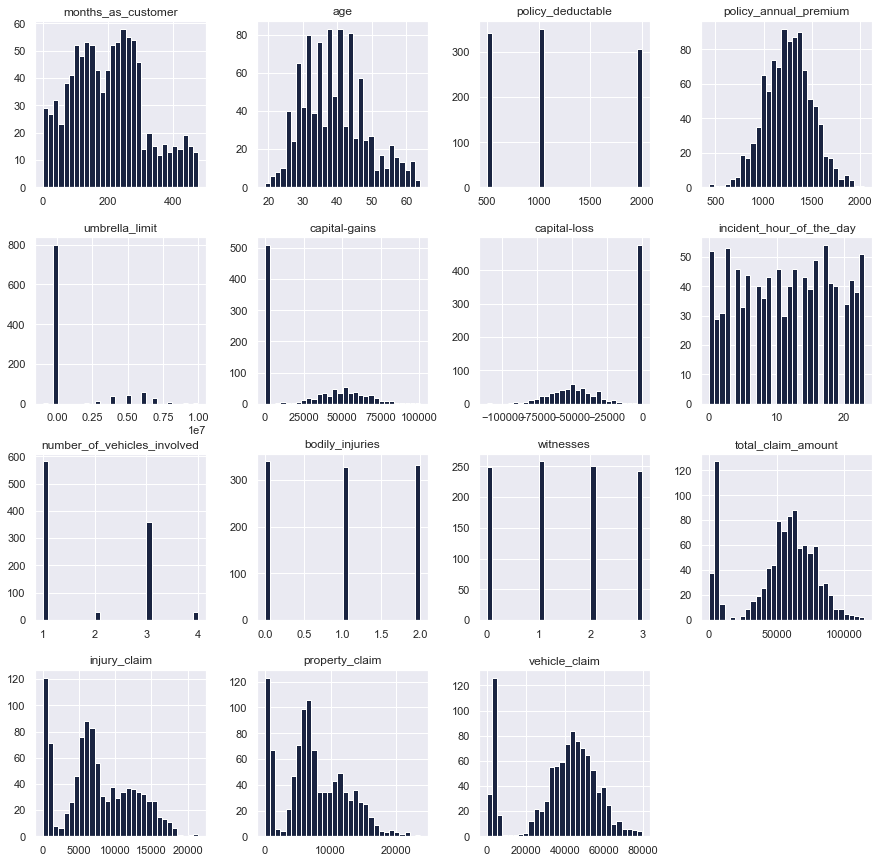

In [281]:
# lets plot histograms for all continuous variables

df[num_fea].hist(bins=30, figsize=(15,15))
plt.show()

In [282]:
num_fea

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

#### Number of labels: cardinality

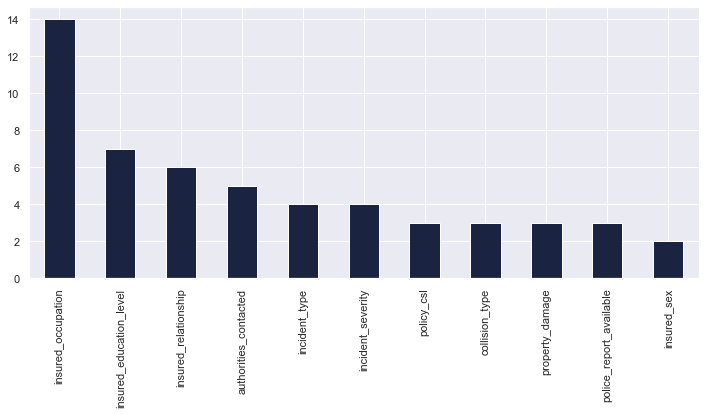

In [283]:
# we count unique categories with pandas unique() 
# and then plot them in descending order

df[cat_fea].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5));

In [284]:
cat_fea

['policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'property_damage',
 'police_report_available']

In [285]:
# custom mapping for encoding
df['policy_csl'] = df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
df['insured_education_level'] = df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
df['incident_severity'] = df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
df['insured_sex'] = df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
df['property_damage'] = df['property_damage'].map({'NO' : 0, 'YES' : 1,'Missing' :2})
df['police_report_available'] = df['police_report_available'].map({'NO' : 0, 'YES' : 1,'Missing' :2})


In [286]:
#output variable:
df['fraud_reported'] = df['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [287]:
from sklearn.preprocessing import LabelEncoder 

In [288]:
le = LabelEncoder()

In [289]:
df['insured_relationship']  = le.fit_transform(df['insured_relationship'])
df['incident_type']         = le.fit_transform(df['incident_type']) 
df['incident_type']         = le.fit_transform(df['incident_type'])
df['collision_type']        = le.fit_transform(df['collision_type'])
df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])
df['insured_occupation'] = le.fit_transform(df['insured_occupation'])

In [290]:
df

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,2.5,1000,1406.91,0,1,6,2,0,53300,0,2,2,3,4,5,1,1,1,2,1,71610,6510,13020,52080,1
1,228,42,2.5,2000,1197.22,5000000,1,6,6,2,0,0,3,1,2,4,8,1,2,0,0,2,5070,780,780,3510,1
2,134,29,1.0,2000,1413.14,5000000,0,7,11,3,35100,0,0,1,2,4,7,3,0,2,3,0,34650,7700,3850,23100,0
3,256,41,2.5,2000,1415.74,6000000,0,7,1,4,48900,-62400,2,0,3,4,5,1,2,1,2,0,63400,6340,6340,50720,1
4,228,44,5.0,1000,1583.91,6000000,1,5,11,4,66000,-46000,3,1,2,2,20,1,0,0,1,0,6500,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,5.0,1000,1310.80,0,0,4,2,4,0,0,2,0,2,1,20,1,1,0,1,2,87200,17440,8720,61040,0
996,285,41,1.0,1000,1436.79,0,0,7,9,5,70900,0,2,1,3,1,23,1,1,2,3,2,108480,18080,18080,72320,0
997,130,34,2.5,500,1383.49,3000000,0,4,1,2,35100,0,0,2,2,4,4,3,2,2,3,1,67500,7500,7500,52500,0
998,458,62,5.0,2000,1356.92,5000000,1,5,5,5,0,0,2,1,3,3,2,1,2,0,1,1,46980,5220,5220,36540,0


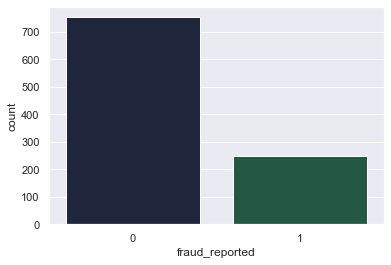

In [291]:
#visualizing output feature:
sns.countplot(x='fraud_reported',data=df)
sns.set(palette='cubehelix')

In [292]:
X = df.drop('fraud_reported',axis=1)
y = df['fraud_reported']

In [293]:
X #independant features

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,2.5,1000,1406.91,0,1,6,2,0,53300,0,2,2,3,4,5,1,1,1,2,1,71610,6510,13020,52080
1,228,42,2.5,2000,1197.22,5000000,1,6,6,2,0,0,3,1,2,4,8,1,2,0,0,2,5070,780,780,3510
2,134,29,1.0,2000,1413.14,5000000,0,7,11,3,35100,0,0,1,2,4,7,3,0,2,3,0,34650,7700,3850,23100
3,256,41,2.5,2000,1415.74,6000000,0,7,1,4,48900,-62400,2,0,3,4,5,1,2,1,2,0,63400,6340,6340,50720
4,228,44,5.0,1000,1583.91,6000000,1,5,11,4,66000,-46000,3,1,2,2,20,1,0,0,1,0,6500,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,5.0,1000,1310.80,0,0,4,2,4,0,0,2,0,2,1,20,1,1,0,1,2,87200,17440,8720,61040
996,285,41,1.0,1000,1436.79,0,0,7,9,5,70900,0,2,1,3,1,23,1,1,2,3,2,108480,18080,18080,72320
997,130,34,2.5,500,1383.49,3000000,0,4,1,2,35100,0,0,2,2,4,4,3,2,2,3,1,67500,7500,7500,52500
998,458,62,5.0,2000,1356.92,5000000,1,5,5,5,0,0,2,1,3,3,2,1,2,0,1,1,46980,5220,5220,36540


In [294]:
y #dependent featrure

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [295]:
from sklearn.model_selection import train_test_split

In [296]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=1)
print("The shape of training data :",X_train.shape,y_train.shape)
print("The shape of testing data :", X_test.shape,y_test.shape)

The shape of training data : (700, 26) (700,)
The shape of testing data : (300, 26) (300,)


In [297]:
X_train

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
731,219,43,1.0,1000,1114.29,0,0,2,13,2,51300,0,2,2,3,0,1,1,2,2,2,1,66660,6060,6060,54540
716,99,28,1.0,500,1330.39,0,1,6,9,5,0,0,2,0,4,3,3,1,0,2,2,1,49900,4990,9980,34930
640,182,38,5.0,2000,1441.06,0,0,4,1,0,53800,-78300,2,2,4,4,18,1,2,2,3,1,89650,8150,16300,65200
804,267,46,2.5,2000,1111.17,0,1,6,2,4,35000,0,1,1,1,2,3,1,1,2,3,1,4950,900,450,3600
737,160,33,5.0,1000,1422.78,0,0,2,3,0,61600,0,0,0,4,0,17,3,2,2,3,1,52800,5280,5280,42240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,253,46,1.0,500,1358.20,0,0,6,13,0,52900,0,0,0,3,0,11,3,1,0,0,0,64570,5870,11740,46960
72,199,41,2.5,1000,895.83,0,0,5,11,0,0,0,2,1,2,0,10,1,0,1,2,0,30100,3010,0,27090
908,285,44,2.5,2000,1144.30,0,1,6,8,1,52600,0,3,1,2,4,3,1,1,1,0,2,5500,500,500,4500
235,428,54,1.0,2000,1506.21,0,1,4,13,4,0,-24400,0,2,2,1,16,3,0,1,0,2,76560,12760,6380,57420


In [298]:
X_test

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
507,86,29,1.0,2000,1409.06,0,1,2,9,0,74200,-68100,2,0,2,4,0,1,0,2,2,1,62920,9680,14520,38720
818,286,41,2.5,1000,999.43,0,1,3,9,5,25800,0,3,1,1,4,3,1,1,2,0,2,4100,820,410,2870
452,101,33,5.0,1000,1313.64,0,0,3,8,4,12100,0,1,1,1,2,3,1,1,1,0,0,4290,780,390,3120
368,10,19,2.5,1000,1185.78,0,0,1,2,5,0,-60700,2,2,2,4,5,1,2,0,2,2,48950,4450,8900,35600
242,190,40,5.0,2000,965.21,0,0,1,3,2,36900,-53700,1,1,1,2,10,1,2,2,1,1,6300,630,630,5040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,163,38,5.0,2000,1453.92,0,0,7,7,2,51700,0,2,2,2,0,13,1,1,2,3,2,79500,15900,7950,55650
415,108,32,5.0,2000,1257.00,4000000,0,2,6,4,63900,-43700,2,0,4,3,23,1,0,1,3,0,61270,5570,11140,44560
61,245,44,5.0,1000,1168.20,0,1,1,5,0,69100,0,0,2,4,3,23,3,0,0,3,0,44280,7380,3690,33210
347,257,43,5.0,2000,929.70,6000000,0,7,5,0,46400,-74300,2,0,4,3,12,1,2,2,2,1,63240,10540,5270,47430


In [299]:
from sklearn.preprocessing import MinMaxScaler

In [300]:
df_norm = MinMaxScaler()
X_train_norm = df_norm.fit_transform(X_train.iloc[:,:26])  #Normalizing X_train data:
X_train_norm = pd.DataFrame(X_train_norm,columns=df.columns[:-1])
X_train_norm

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,0.457203,0.511628,0.000,0.333333,0.402849,0.090909,0.0,0.166667,1.000000,0.4,0.519231,1.000000,0.666667,1.0,0.666667,0.00,0.043478,0.000000,1.0,1.0,0.666667,0.5,0.579690,0.284107,0.256020,0.685243
1,0.206681,0.162791,0.000,0.000000,0.541115,0.090909,1.0,0.833333,0.692308,1.0,0.000000,1.000000,0.666667,0.0,1.000000,0.75,0.130435,0.000000,0.0,1.0,0.666667,0.5,0.433722,0.233943,0.421631,0.438546
2,0.379958,0.395349,1.000,1.000000,0.611925,0.090909,0.0,0.500000,0.076923,0.0,0.544534,0.295230,0.666667,1.0,1.000000,1.00,0.782609,0.000000,1.0,1.0,1.000000,0.5,0.779916,0.382091,0.688635,0.819348
3,0.557411,0.581395,0.375,1.000000,0.400852,0.090909,1.0,0.833333,0.153846,0.8,0.354251,1.000000,0.333333,0.5,0.000000,0.50,0.130435,0.000000,0.5,1.0,1.000000,0.5,0.042240,0.042194,0.019011,0.044408
4,0.334029,0.279070,1.000,0.333333,0.600229,0.090909,0.0,0.166667,0.230769,0.0,0.623482,1.000000,0.000000,0.0,1.000000,0.00,0.739130,0.666667,1.0,1.0,1.000000,0.5,0.458979,0.247539,0.223067,0.530507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.528184,0.581395,0.000,0.000000,0.558909,0.090909,0.0,0.833333,1.000000,0.0,0.535425,1.000000,0.000000,0.0,0.666667,0.00,0.478261,0.666667,0.5,0.0,0.000000,0.0,0.561488,0.275199,0.495986,0.589886
696,0.415449,0.465116,0.375,0.333333,0.263072,0.090909,0.0,0.666667,0.846154,0.0,0.000000,1.000000,0.666667,0.5,0.333333,0.00,0.434783,0.000000,0.0,0.5,0.666667,0.0,0.261279,0.141116,0.000000,0.339917
697,0.594990,0.534884,0.375,1.000000,0.422050,0.090909,1.0,0.833333,0.615385,0.2,0.532389,1.000000,1.000000,0.5,0.333333,1.00,0.130435,0.000000,0.5,0.5,0.000000,1.0,0.047030,0.023441,0.021124,0.055730
698,0.893528,0.767442,0.000,1.000000,0.653610,0.090909,1.0,0.500000,1.000000,0.8,0.000000,0.780378,0.000000,1.0,0.333333,0.25,0.695652,0.666667,0.0,0.5,0.000000,1.0,0.665912,0.598218,0.269540,0.721474


In [301]:
X_test_norm = df_norm.transform(X_test.iloc[:,:26])  #Normalizing X_test data:
X_test_norm = pd.DataFrame(X_test_norm,columns=df.columns[:-1])
X_test_norm

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,0.179541,0.186047,0.000,1.000000,0.591451,0.090909,1.0,0.166667,0.692308,0.0,0.751012,0.387039,0.666667,0.0,0.333333,1.00,0.000000,0.000000,0.0,1.0,0.666667,0.5,0.547117,0.453821,0.613435,0.486225
1,0.597077,0.465116,0.375,0.333333,0.329358,0.090909,1.0,0.333333,0.692308,1.0,0.261134,1.000000,1.000000,0.5,0.000000,1.00,0.130435,0.000000,0.5,1.0,0.000000,1.0,0.034837,0.038444,0.017322,0.035225
2,0.210856,0.279070,1.000,0.333333,0.530398,0.090909,0.0,0.333333,0.615385,0.8,0.122470,1.000000,0.333333,0.5,0.000000,0.50,0.130435,0.000000,0.5,0.5,0.000000,0.0,0.036492,0.036568,0.016477,0.038370
3,0.020877,-0.046512,0.375,0.333333,0.448590,0.090909,0.0,0.000000,0.153846,1.0,0.000000,0.453645,0.666667,1.0,0.333333,1.00,0.217391,0.000000,1.0,0.0,0.666667,1.0,0.425449,0.208626,0.376003,0.446974
4,0.396660,0.441860,1.000,1.000000,0.307463,0.090909,0.0,0.000000,0.230769,0.4,0.373482,0.516652,0.333333,0.5,0.000000,0.50,0.434783,0.000000,1.0,1.0,0.333333,0.5,0.053998,0.029536,0.026616,0.062524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.340292,0.395349,1.000,1.000000,0.620153,0.090909,0.0,1.000000,0.538462,0.4,0.523279,1.000000,0.666667,1.0,0.333333,0.00,0.565217,0.000000,0.5,1.0,1.000000,1.0,0.691517,0.745429,0.335868,0.699207
296,0.225470,0.255814,1.000,1.000000,0.494158,0.454545,0.0,0.166667,0.461538,0.8,0.646761,0.606661,0.666667,0.0,1.000000,0.75,1.000000,0.000000,0.0,0.5,1.000000,0.0,0.532747,0.261135,0.470638,0.559693
297,0.511482,0.534884,1.000,0.333333,0.437342,0.090909,1.0,0.000000,0.384615,0.0,0.699393,1.000000,0.000000,1.0,1.000000,0.75,1.000000,0.666667,0.0,0.0,1.000000,0.0,0.384776,0.345992,0.155894,0.416908
298,0.536534,0.511628,1.000,1.000000,0.284743,0.636364,0.0,1.000000,0.384615,0.0,0.469636,0.331233,0.666667,0.0,1.000000,0.75,0.521739,0.000000,1.0,1.0,0.666667,0.5,0.549904,0.494140,0.222645,0.595798


## Feature Selection

In [302]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [303]:
selector = SelectFromModel(estimator=LogisticRegression(random_state=1))

In [304]:
selector.fit(X_train_norm,y_train)

SelectFromModel(estimator=LogisticRegression(random_state=1))

In [305]:
selector.get_support().sum()

10

In [307]:
# let's visualise those features that were selected.
# (selected features marked with True)
selector.get_support()

array([False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False,  True,  True,  True,  True])

In [308]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train_norm.columns[(selector.get_support())]

# let's print some stats
print('total features: {}'.format((X_train_norm.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    sum(selector.estimator_.coef_)))

total features: 26
selected features: 10
features with coefficients shrank to zero: [ 0.16237491 -0.40767073 -0.15694973  0.12025833 -0.2909019   0.61349254
  0.26464785 -0.08740833 -0.043933    0.16039411 -0.12442586  0.14068041
  0.0565449   0.01994035  0.53196456 -0.17889015 -0.06444449  0.1334638
  0.5287207   0.12346764  0.31604748 -0.07995903  0.62611846 -0.45599043
  0.31294416  0.93351582]


In [309]:
print(len(selected_feats))
selected_feats

10


Index(['age', 'policy_annual_premium', 'umbrella_limit', 'incident_severity',
       'property_damage', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim'],
      dtype='object')

In [310]:
# reduce the train and test set to the selected features

X_train_final = X_train_norm[selected_feats]
X_test_final  = X_test_norm[selected_feats]

In [311]:
print("The shape of training data :",X_train_final.shape,y_train.shape)  
print("The shape of testing data :" ,X_test_final.shape,y_test.shape)


The shape of training data : (700, 10) (700,)
The shape of testing data : (300, 10) (300,)


In [312]:
X_kf = pd.concat([X_train_final,X_test_final],axis=0)
X_kf

,age,policy_annual_premium,umbrella_limit,incident_severity,property_damage,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,0.511628,0.402849,0.090909,0.666667,1.0,0.666667,0.579690,0.284107,0.256020,0.685243
1,0.162791,0.541115,0.090909,1.000000,0.0,0.666667,0.433722,0.233943,0.421631,0.438546
2,0.395349,0.611925,0.090909,1.000000,1.0,1.000000,0.779916,0.382091,0.688635,0.819348
3,0.581395,0.400852,0.090909,0.000000,0.5,1.000000,0.042240,0.042194,0.019011,0.044408
4,0.279070,0.600229,0.090909,1.000000,1.0,1.000000,0.458979,0.247539,0.223067,0.530507
...,...,...,...,...,...,...,...,...,...,...
295,0.395349,0.620153,0.090909,0.333333,0.5,1.000000,0.691517,0.745429,0.335868,0.699207
296,0.255814,0.494158,0.454545,1.000000,0.0,1.000000,0.532747,0.261135,0.470638,0.559693
297,0.534884,0.437342,0.090909,1.000000,0.0,1.000000,0.384776,0.345992,0.155894,0.416908
298,0.511628,0.284743,0.636364,1.000000,1.0,0.666667,0.549904,0.494140,0.222645,0.595798


In [313]:
y_kf =pd.concat([y_train,y_test],axis=0)
y_kf

731    0
716    0
640    0
804    0
737    0
      ..
459    0
415    0
61     0
347    0
349    1
Name: fraud_reported, Length: 1000, dtype: int64

In [314]:
y_kf.shape

(1000,)

## Model Training:

In [315]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [316]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [317]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### 1) Decision Tree:

In [318]:
dt_model = DecisionTreeClassifier(random_state=1,criterion='gini',max_depth=4,min_samples_split=2)
dt_model.fit(X_train_final,y_train)
y_pred_dt = dt_model.predict(X_train_final)

In [319]:
#training accuracy
dt_1 =accuracy_score(y_train,y_pred_dt)
dt_1

0.8371428571428572

In [320]:
y_pred_dt_test = dt_model.predict(X_test_final)

#testing accuracy
dt_2=accuracy_score(y_test,y_pred_dt_test)
dt_2

0.7666666666666667

## 2) Random Forest

In [321]:
rf_model = RandomForestClassifier(random_state=1,n_estimators=30, max_depth=None, min_samples_split=2)
rf_model.fit(X_train_final,y_train)
y_pred_rf = dt_model.predict(X_train_final)

In [322]:
#training accuracy
rf_1=accuracy_score(y_train,y_pred_rf)
rf_1

0.8371428571428572

In [323]:
y_pred_rf_test = rf_model.predict(X_test_final)

#testing accuracy
rf_2=accuracy_score(y_test,y_pred_rf_test)
rf_2

0.7666666666666667

## 3)Xtreme GB:

In [324]:
xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(X_train_final,y_train)
y_pred_xgb = xgb_model.predict(X_train_final)

In [325]:
#training accuracy
xgb_1=accuracy_score(y_train,y_pred_xgb)
xgb_1

1.0

In [326]:
y_pred_xgb_test = xgb_model.predict(X_test_final)

#testing accuracy
xgb_2=accuracy_score(y_test,y_pred_xgb_test)
xgb_2

0.72

## 4) LightGB:

In [327]:
lgb_model = LGBMClassifier(random_state=1,n_estimators=100)
lgb_model.fit(X_train_final,y_train)
y_pred_lgb = lgb_model.predict(X_train_final)

In [328]:
#training accuracy
lgb_1=accuracy_score(y_train,y_pred_lgb)
lgb_1

1.0

In [329]:
y_pred_lgb_test = lgb_model.predict(X_test_final)

#testing accuracy
lgb_2=accuracy_score(y_test,y_pred_lgb_test)
lgb_2

0.7433333333333333

## 5) KNN:

In [330]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_final,y_train)
y_pred_knn = knn_model.predict(X_train_final)

In [331]:
#training accuracy
knn_1=accuracy_score(y_train,y_pred_knn)
knn_1

0.8814285714285715

In [332]:
y_pred_knn_test = knn_model.predict(X_test_final)

#testing accuracy
knn_2=accuracy_score(y_test,y_pred_knn_test)
knn_2

0.7333333333333333

## 6) SVM:

In [333]:
svm_model=SVC(random_state=1,kernel='rbf')
svm_model.fit(X_train_final,y_train)
y_pred_svm = svm_model.predict(X_train_final)

In [334]:
#training accuracy
svm_1=accuracy_score(y_train,y_pred_svm)
svm_1

0.7685714285714286

In [335]:
y_pred_svm_test = knn_model.predict(X_test_final)

#testing accuracy
svm_2=accuracy_score(y_test,y_pred_svm_test)
svm_2

0.7333333333333333

### K Fold Cross Validation


In [336]:
from sklearn.model_selection import KFold

kfold_validation=KFold(10)

In [337]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(dt_model,X_kf,y_kf,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.77 0.82 0.8  0.79 0.77 0.85 0.76 0.82 0.84 0.76]
0.7979999999999999


### Stratified K-fold Cross Validation


In [338]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)

scores=cross_val_score(dt_model,X_kf,y_kf,cv=skfold)

print(scores)
print(np.mean(scores))

[0.8   0.79  0.795 0.79  0.74 ]
0.783


In [339]:
model_comparisons =pd.DataFrame( {'Models':['Decision Tree','Random Forest','Xtrem GB','Light Gb','KNN','SVM'],
                    'Train_Accuracy':[dt_1,rf_1,xgb_1,lgb_1,knn_1,svm_1],
                    'Test_Accuracy':[dt_2,rf_2,xgb_2,lgb_2,knn_2,svm_2]})
model_comparisons

,Models,Train_Accuracy,Test_Accuracy
0,Decision Tree,0.837143,0.766667
1,Random Forest,0.837143,0.766667
2,Xtrem GB,1.000000,0.720000
3,Light Gb,1.000000,0.743333
4,KNN,0.881429,0.733333
5,SVM,0.768571,0.733333


In [340]:
import pickle

In [352]:
#loading the model
pickle.dump(dt_model,open('dt_model.pkl','wb'))

In [355]:
#reading the model
pickled_model = pickle.load(open('dt_model.pkl','rb'))

## Testing Data Prediction

In [242]:
X_kf.columns

Index(['age', 'policy_annual_premium', 'umbrella_limit', 'incident_severity',
       'property_damage', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim'],
      dtype='object')

In [342]:
X_for_test = df[['age', 'policy_annual_premium', 'umbrella_limit', 'incident_severity', 
       'property_damage', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim']]  #Only 10 features selected after feature selection
X_for_test

,age,policy_annual_premium,umbrella_limit,incident_severity,property_damage,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,48,1406.91,0,3,1,2,71610,6510,13020,52080
1,42,1197.22,5000000,2,2,0,5070,780,780,3510
2,29,1413.14,5000000,2,0,3,34650,7700,3850,23100
3,41,1415.74,6000000,3,2,2,63400,6340,6340,50720
4,44,1583.91,6000000,2,0,1,6500,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...
995,38,1310.80,0,2,1,1,87200,17440,8720,61040
996,41,1436.79,0,3,1,3,108480,18080,18080,72320
997,34,1383.49,3000000,2,2,3,67500,7500,7500,52500
998,62,1356.92,5000000,3,2,1,46980,5220,5220,36540


In [343]:
minmax = MinMaxScaler()
minmax = minmax.fit(X_for_test)

In [344]:
#Test:1
input_data=(48,1406.91,0,3,1,2,71610,6510,13020,52080)

# changing the input_data to numpy array
input_data_as_np_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

#Normalizing the data as we build model like this
input_data_transfer = minmax.transform(input_data_reshaped)

Prediction = dt_model.predict(input_data_transfer)
print(Prediction)

if Prediction == 1:
    print('The claim is Fraudulent')
else:
    print('The claim is not Fraudulent')

[1]
The claim is Fraudulent


In [345]:
#Test2
input_data=(42,1197.22,5000000,2,2,0,5070,780,780,3510)

# changing the input_data to numpy array
input_data_as_np_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

#Normalizing the data as we build model like this
input_data_transfer = minmax.transform(input_data_reshaped)

Prediction = dt_model.predict(input_data_reshaped)
print(Prediction)

if Prediction == 1:
    print('The claim is Fraudulent')
else:
    print('The claim is not Fraudulent')

[1]
The claim is Fraudulent


In [346]:
#Test3:
input_data=(60,766.19,0,2,2,3,5060,460,920,3680)

# changing the input_data to numpy array
input_data_as_np_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

#Normalizing the data as we build model like this
input_data_trasnf = minmax.fit_transform(input_data_reshaped)


Prediction = dt_model.predict(input_data_trasnf)
print(Prediction)

if Prediction == 1:
    print('The claim is Fraudulent')
else:
    print('The claim is not Fraudulent')

[0]
The claim is not Fraudulent


In [347]:
#Test4:
input_data=(38,1310.80,0,2,1,1,87200,17440,8720,61040)

# changing the input_data to numpy array
input_data_as_np_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

#Normalizing the data as we build model like this
input_data_transfer = minmax.transform(input_data_reshaped)

Prediction = dt_model.predict(input_data_reshaped)
print(Prediction)

if Prediction == 1:
    print('The claim is Fraudulent')
else:
    print('The claim is not Fraudulent')

[0]
The claim is not Fraudulent


In [359]:
pickled_model.predict(input_data_transfer)  #examing with test4..it gave correct output

array([0], dtype=int64)